In [8]:
# Import stuff

import rpy2.interactive 
import rpy2.interactive.packages
%load_ext rpy2.ipython

# Directly convert objects from pandas to r and vsv
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Set the global figure size
plt.rcParams['figure.figsize'] = (8.0, 8.0)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [7]:
%%R
# Load R libaries
library(ggplot2)
library(dplyr)

In [2]:
%ls

correlation_images.jpeg  lesson4_student.rmd  pseudo_facebook.tsv
Lesson 4.ipynb           Mitchell.csv


In [ ]:
#let's move the correct data file over from lesson 3 and use some bash knowledge
!cp  Data-Science/dand/exploratory_data_analysis/lesson3/pseudo_facebook.tsv
     Data-Science/dand/exploratory_data_analysis/lesson4/
# I dit it in bash

In [3]:
%ls #yep

correlation_images.jpeg  lesson4_student.rmd
Lesson 4.ipynb           pseudo_facebook.tsv


# Load and summarize

## In R

In [3]:
%%R
#load it in R
pf <-read.csv('pseudo_facebook.tsv', sep='\t')
head(pf)

   userid age dob_day dob_year dob_month gender tenure friend_count
1 2094382  14      19     1999        11   male    266            0
2 1192601  14       2     1999        11 female      6            0
3 2083884  14      16     1999        11   male     13            0
4 1203168  14      25     1999        12 female     93            0
5 1733186  14       4     1999        12   male     82            0
6 1524765  14       1     1999        12   male     15            0
  friendships_initiated likes likes_received mobile_likes mobile_likes_received
1                     0     0              0            0                     0
2                     0     0              0            0                     0
3                     0     0              0            0                     0
4                     0     0              0            0                     0
5                     0     0              0            0                     0
6                     0     0              0

In [6]:
%R names(pf)

array(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender',
       'tenure', 'friend_count', 'friendships_initiated', 'likes',
       'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes', 'www_likes_received'], 
      dtype='<U21')

In [8]:
%%R
summary(pf)

     userid             age            dob_day         dob_year   
 Min.   :1000008   Min.   : 13.00   Min.   : 1.00   Min.   :1900  
 1st Qu.:1298806   1st Qu.: 20.00   1st Qu.: 7.00   1st Qu.:1963  
 Median :1596148   Median : 28.00   Median :14.00   Median :1985  
 Mean   :1597045   Mean   : 37.28   Mean   :14.53   Mean   :1976  
 3rd Qu.:1895744   3rd Qu.: 50.00   3rd Qu.:22.00   3rd Qu.:1993  
 Max.   :2193542   Max.   :113.00   Max.   :31.00   Max.   :2000  
                                                                  
   dob_month         gender          tenure        friend_count   
 Min.   : 1.000   female:40254   Min.   :   0.0   Min.   :   0.0  
 1st Qu.: 3.000   male  :58574   1st Qu.: 226.0   1st Qu.:  31.0  
 Median : 6.000   NA's  :  175   Median : 412.0   Median :  82.0  
 Mean   : 6.283                  Mean   : 537.9   Mean   : 196.4  
 3rd Qu.: 9.000                  3rd Qu.: 675.0   3rd Qu.: 206.0  
 Max.   :12.000                  Max.   :3139.0   Max.   :4923

In [9]:
%%R
str(pf)

'data.frame':	99003 obs. of  15 variables:
 $ userid               : int  2094382 1192601 2083884 1203168 1733186 1524765 1136133 1680361 1365174 1712567 ...
 $ age                  : int  14 14 14 14 14 14 13 13 13 13 ...
 $ dob_day              : int  19 2 16 25 4 1 14 4 1 2 ...
 $ dob_year             : int  1999 1999 1999 1999 1999 1999 2000 2000 2000 2000 ...
 $ dob_month            : int  11 11 11 12 12 12 1 1 1 2 ...
 $ gender               : Factor w/ 2 levels "female","male": 2 1 2 1 2 2 2 1 2 2 ...
 $ tenure               : int  266 6 13 93 82 15 12 0 81 171 ...
 $ friend_count         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ friendships_initiated: int  0 0 0 0 0 0 0 0 0 0 ...
 $ likes                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ likes_received       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mobile_likes         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mobile_likes_received: int  0 0 0 0 0 0 0 0 0 0 ...
 $ www_likes            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ www_likes_received   : int  0 0 0

In [4]:
pf = pd.read_csv('pseudo_facebook.tsv', sep='\t')
pf.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [18]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [5]:
#Make gender categorical
pf['gender'] = pf['gender'].astype('category')

In [20]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null category
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: category(1), float64(1), int64(13)
memory usage: 10.7 MB


In [21]:
pf.gender

0          male
1        female
2          male
3        female
4          male
5          male
6          male
7        female
8          male
9          male
10         male
11         male
12         male
13         male
14       female
15       female
16       female
17       female
18       female
19         male
20       female
21       female
22         male
23         male
24         male
25         male
26         male
27         male
28         male
29         male
          ...  
98973    female
98974      male
98975      male
98976    female
98977    female
98978    female
98979    female
98980    female
98981    female
98982    female
98983    female
98984    female
98985      male
98986    female
98987    female
98988      male
98989    female
98990      male
98991    female
98992    female
98993      male
98994    female
98995    female
98996    female
98997    female
98998    female
98999    female
99000    female
99001    female
99002    female
Name: gender, dtype: cat

### Try to cast the numerical codes to categories like in R

In [14]:
pf['gender'] = pf['gender'].cat.codes

In [15]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null int8
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), int8(1)
memory usage: 10.7 MB


In [16]:
pf.gender # it turrns them into numbers but without retainning the string information

0        1
1        0
2        1
3        0
4        1
5        1
6        1
7        0
8        1
9        1
10       1
11       1
12       1
13       1
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
98973    0
98974    1
98975    1
98976    0
98977    0
98978    0
98979    0
98980    0
98981    0
98982    0
98983    0
98984    0
98985    1
98986    0
98987    0
98988    1
98989    0
98990    1
98991    0
98992    0
98993    1
98994    0
98995    0
98996    0
98997    0
98998    0
98999    0
99000    0
99001    0
99002    0
Name: gender, dtype: int8

In [22]:
pf.gender.cat.categories #There they are!

Index(['female', 'male'], dtype='object')

In [24]:
pf.gender.cat.codes

0        1
1        0
2        1
3        0
4        1
5        1
6        1
7        0
8        1
9        1
10       1
11       1
12       1
13       1
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
98973    0
98974    1
98975    1
98976    0
98977    0
98978    0
98979    0
98980    0
98981    0
98982    0
98983    0
98984    0
98985    1
98986    0
98987    0
98988    1
98989    0
98990    1
98991    0
98992    0
98993    1
98994    0
98995    0
98996    0
98997    0
98998    0
98999    0
99000    0
99001    0
99002    0
dtype: int8

In [25]:
# This seems to work
pd.factorize(pf.gender)

(array([0, 1, 0, ..., 1, 1, 1]), Index(['male', 'female'], dtype='object'))

In [26]:
pf['gender'] = pd.factorize(pf.gender) # This does not work because they have different indexes

ValueError: Length of values does not match length of index

[Great answer here](https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers)

# Make a Scatterplot

## In R

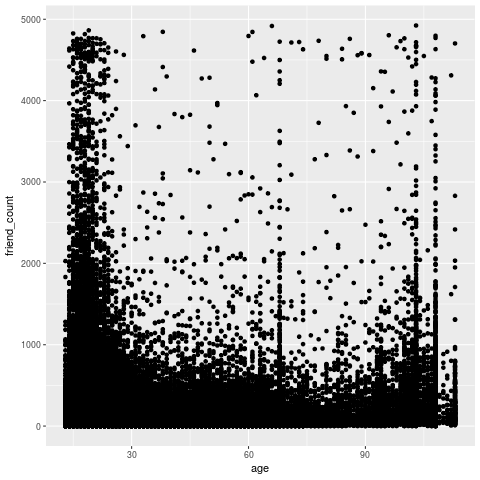

In [27]:
%%R
qplot(x=age, y=friend_count, data=pf)

### Use ggplot syntax to set xlim

In [42]:
%%R
#Find the limits
summary(pf$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   20.00   28.00   37.28   50.00  113.00 


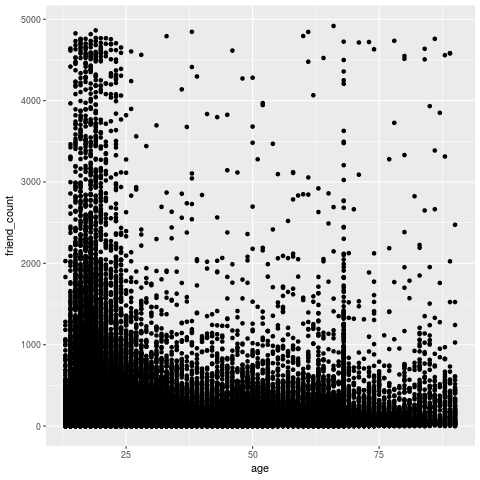

In [39]:
%%R
ggplot(aes(x=age, y=friend_count), data=pf) + geom_point() +
  xlim(13, 90)

### Set Transparency

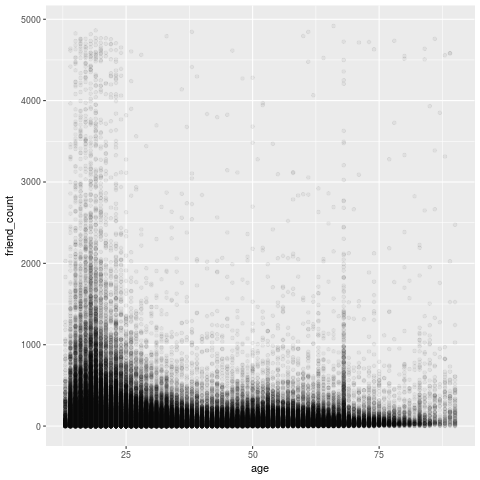

In [45]:
%%R
ggplot(aes(x=age, y=friend_count), data=pf) +
  geom_point(alpha = 1/20) +
  xlim(13, 90)

### Add Jitter

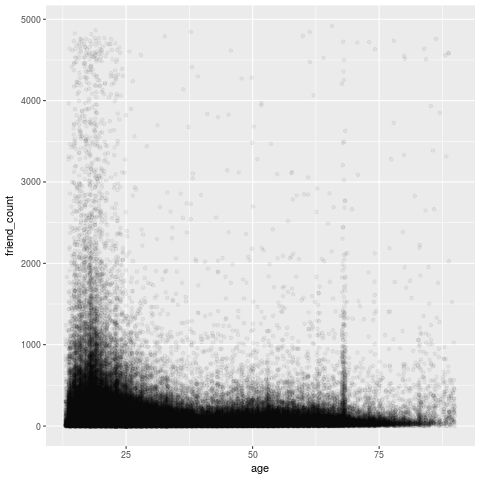

In [48]:
%%R
ggplot(aes(x=age, y=friend_count), data=pf) +
  geom_jitter(alpha = 1/20) +
  xlim(13, 90)

### Coordinate transformation

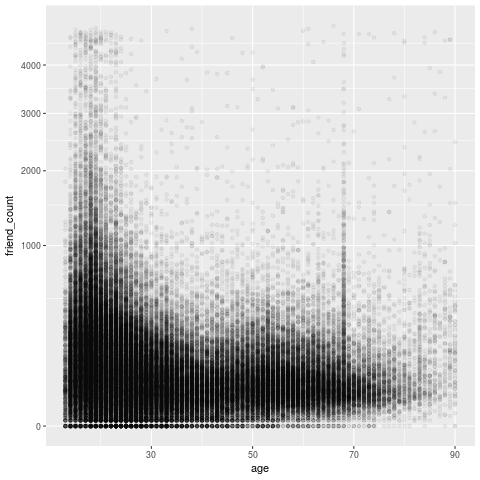

In [61]:
%%R
ggplot(aes(x=age, y=friend_count), data=pf) +
  geom_point(alpha = 1/20) +
  xlim(13, 90) + 
  coord_trans(y = 'sqrt')

### Alpha and Jitter Exercise

Examine the relationship between friendships_initiated (y) and age (x) using the ggplot syntax.

In [ ]:
%%R
ggplot(aes(x=age, y=friendships_initiated), data=pf) +
  geom_point(alpha = 1/20) +
  xlim(13, 90) + 
  coord_trans(y = 'sqrt')

## In Pandas

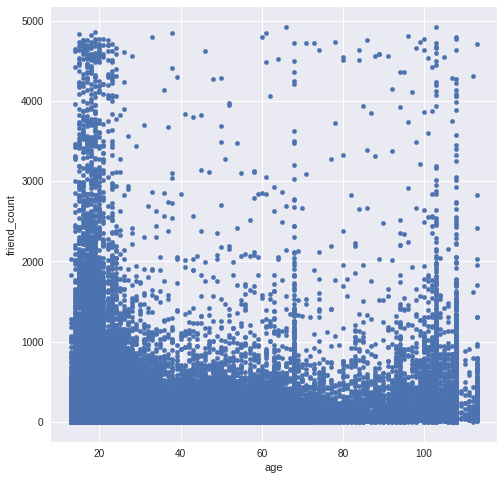

In [36]:
pf.plot.scatter(x='age', y='friend_count', figsize=(8,8));

Three distinct bands of higher fiend counts below 30, at 69 and above 100

In [43]:
pf.age.describe()

count    99003.000000
mean        37.280224
std         22.589748
min         13.000000
25%         20.000000
50%         28.000000
75%         50.000000
max        113.000000
Name: age, dtype: float64

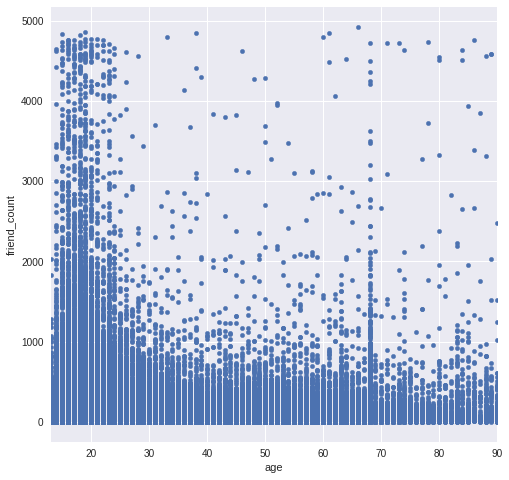

In [44]:
pf.plot.scatter(x='age', y='friend_count', figsize=(8,8))
plt.xlim(13,90);

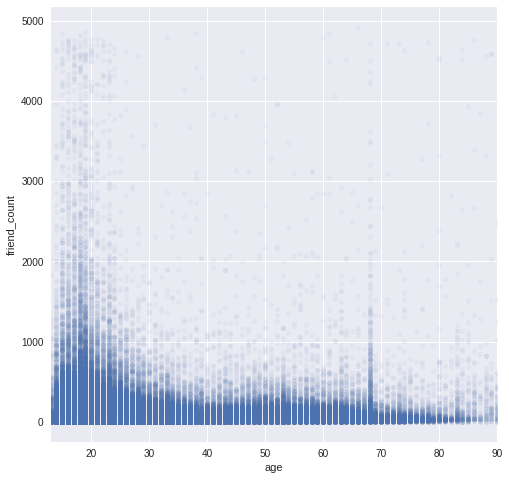

In [47]:
pf.plot.scatter(x='age', y='friend_count',alpha=1/20, figsize=(8,8))
plt.xlim(13,90);

The bulk of friend counts are below 1000

KeyboardInterrupt: 

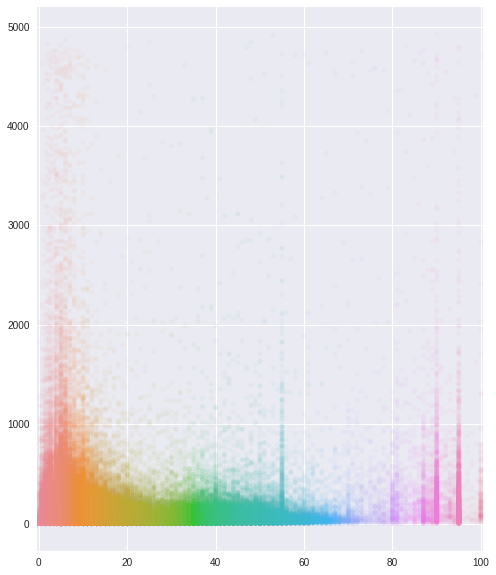

In [72]:
ax = sns.swarmplot(x='age', y='friend_count',data=pf, alpha=1/20) # something ain't right here
ax.set_xlim(13,90)


plt.figure(figsize=(8,8)); #It takes a lot of time, does not recognize the xlim and it doesn't finish

A few useful thoughts about Jitter here: https://github.com/matplotlib/matplotlib/issues/2750

(7.994489975861895,
 118.00551002413813,
 -0.36203723144491262,
 89.863425977652682)

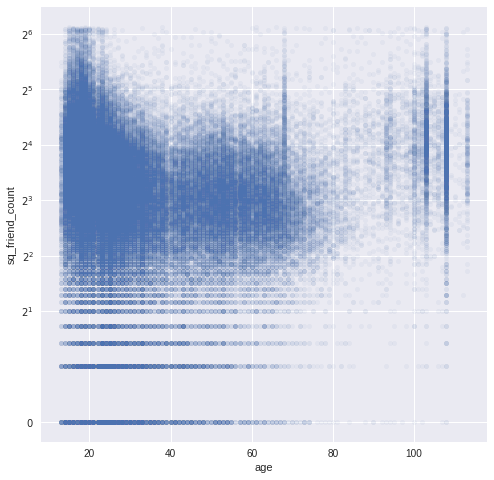

In [70]:
pf['sq_friend_count']  = np.sqrt(pf.friend_count)
ax = pf.plot.scatter(x='age', y='sq_friend_count', alpha=1/20, figsize=(8,8))
plt.xlim(13,90); # The Y 

# There does not seem to exist a equivalennt here although the result is quite interesting
# You probably have to do it by hand

# Conditional Means

In [31]:
%%R

age_groups <- group_by(pf, age)

pf.fc_by_age <- summarise(age_groups,
                          friend_count_mean = mean(friend_count),
                          friend_count_median = median(friend_count),
                          n = n())

pf.fc_by_age <- arrange(pf.fc_by_age, age)

head(pf.fc_by_age)

# A tibble: 6 × 4
    age friend_count_mean friend_count_median     n
  <int>             <dbl>               <dbl> <int>
1    13          164.7500                74.0   484
2    14          251.3901               132.0  1925
3    15          347.6921               161.0  2618
4    16          351.9371               171.5  3086
5    17          350.3006               156.0  3283
6    18          331.1663               162.0  5196


In [98]:
%%R
## Alternative
pf.fc_by_age <- pf %>%
  group_by(age) %>%
  summarise(friend_count_mean = mean(friend_count),
            friend_count_median = median(friend_count),
            n = n()) %>%
  arrange(age)

head(pf.fc_by_age)

# A tibble: 6 × 4
    age friend_count_mean friend_count_median     n
  <int>             <dbl>               <dbl> <int>
1    13          164.7500                74.0   484
2    14          251.3901               132.0  1925
3    15          347.6921               161.0  2618
4    16          351.9371               171.5  3086
5    17          350.3006               156.0  3283
6    18          331.1663               162.0  5196


In [52]:
grouped = pf.groupby('age')
pf_c_by_age = grouped['friend_count'].agg([np.mean, np.median, len])

# pf_c_by_age = pd.DataFrame([pf_c_by_age.index, pf_c_by_age.mean, pf_c_by_age.median, pf_c_by_age.len],
#                            columns=['age','friend_count_mean', 'friend_count_median', 'n'])
                    
pf_c_by_age = pd.DataFrame({'age': pf_c_by_age.index,
                            'friend_count_mean': pf_c_by_age['mean'],
                            'friend_count_median': pf_c_by_age['median'],
                            'n': pf_c_by_age['len']}).reset_index(drop=True) # this one will ake the index and make it a column if drop=False

pf_c_by_age.sort_values('age')
pf_c_by_age.head()

,age,friend_count_mean,friend_count_median,n
0,13,164.750000,74.0,484
1,14,251.390130,132.0,1925
2,15,347.692131,161.0,2618
3,16,351.937135,171.5,3086
4,17,350.300640,156.0,3283


### Plot the conditional means

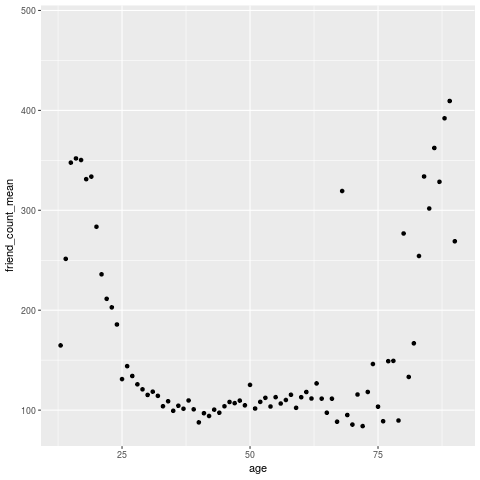

In [99]:
%%R
ggplot(aes(x=age, y=friend_count_mean), data=pf.fc_by_age) +
  geom_point(alpha = 1/1) +
  xlim(13, 90) 

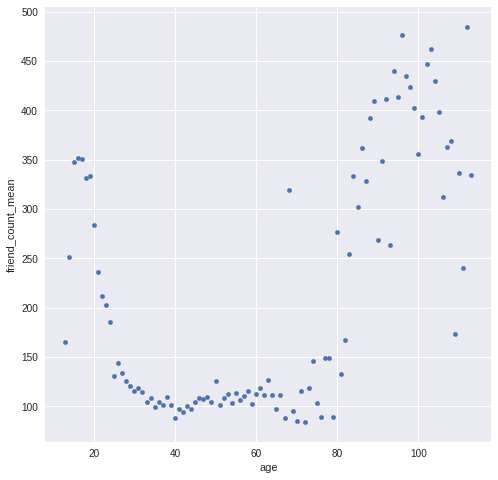

In [103]:
pf_c_by_age.plot.scatter(x='age', y ='friend_count_mean');

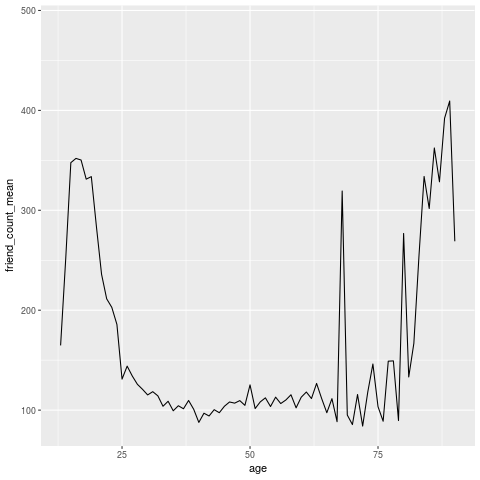

In [100]:
%%R
# With lines
ggplot(aes(x=age, y=friend_count_mean), data=pf.fc_by_age) +
  geom_line(alpha = 1/1) +
  xlim(13, 90) 

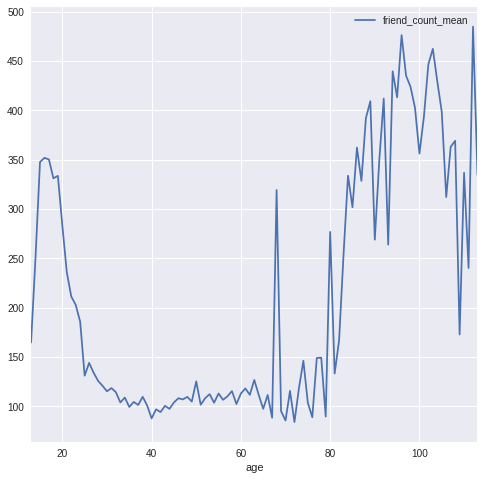

In [104]:
pf_c_by_age.plot.line(x='age', y ='friend_count_mean');

### Overlaying Summaries with Raw Data

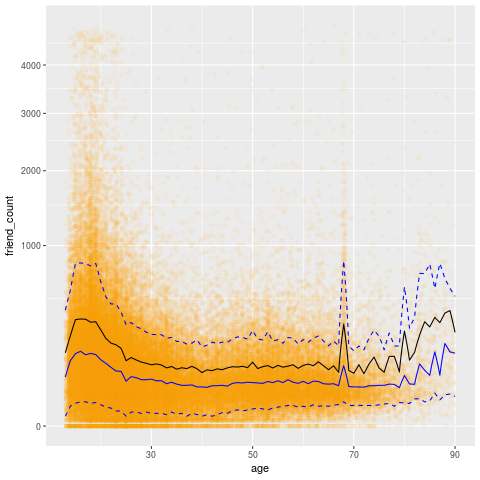

In [105]:
%%R
ggplot(aes(x = age, y=friend_count), data=pf) + 
  xlim(13,90) + 
  geom_point(alpha=0.05,
             position=position_jitter(h=0),
             color='orange') + 
  coord_trans(y='sqrt') + 
  geom_line(stat='summary', fun.y=mean) +
  geom_line(stat='summary', fun.y=quantile, fun.args = list(probs = .1),
            linetype=2, color='blue') +
  geom_line(stat='summary', fun.y=quantile, fun.args = list(probs = .5),
             color='blue') +
   geom_line(stat='summary', fun.y=quantile, fun.args = list(probs = .9),
            linetype=2, color='blue') 

In [107]:
# Try to get the sqrt scale
import matplotlib.scale as mscale
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
import numpy as np

class SquareRootScale(mscale.ScaleBase):
    """
    ScaleBase class for generating square root scale.
    """

    name = 'squareroot'

    def __init__(self, axis, **kwargs):
        mscale.ScaleBase.__init__(self)

    def set_default_locators_and_formatters(self, axis):
        axis.set_major_locator(ticker.AutoLocator())
        axis.set_major_formatter(ticker.ScalarFormatter())
        axis.set_minor_locator(ticker.NullLocator())
        axis.set_minor_formatter(ticker.NullFormatter())

    def limit_range_for_scale(self, vmin, vmax, minpos):
        return  max(0., vmin), vmax

    class SquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def transform_non_affine(self, a): 
            return np.array(a)**0.5

        def inverted(self):
            return SquareRootScale.InvertedSquareRootTransform()

    class InvertedSquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def transform(self, a):
            return np.array(a)**2

        def inverted(self):
            return SquareRootScale.SquareRootTransform()

    def get_transform(self):
        return self.SquareRootTransform()

mscale.register_scale(SquareRootScale)

(13, 90)

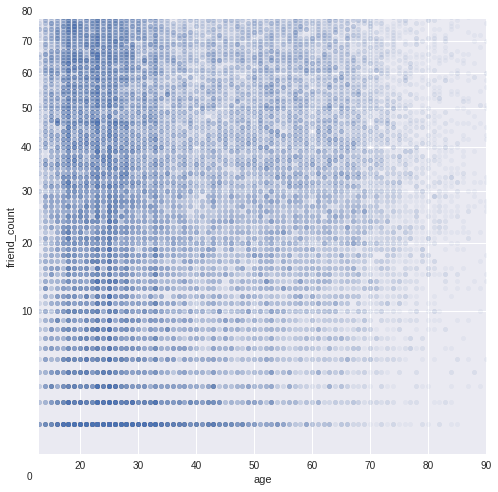

In [109]:
fig, ax = plt.subplots(1)

ax.set_yscale('squareroot')

pf.plot.scatter(x='age', y='friend_count', alpha=1/20, ax=ax)
plt.xlim(13,90)
# Doesn't work

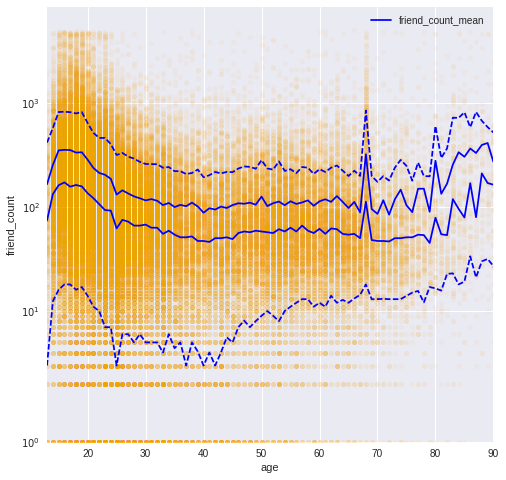

In [161]:
fig, ax = plt.subplots(1)

ax.set_yscale('symlog')

pf.plot.scatter(x='age', y='friend_count', alpha=1/20,color='orange', ax=ax)

pf_c_by_age.plot.line(x='age', y='friend_count_mean',color='blue', ax=ax)

#Ploting the quantile on the fly
pf.groupby('age').friend_count.quantile(0.1).plot.line(color='blue',style='--', ax=ax)
pf.groupby('age').friend_count.quantile(0.5).plot.line(color='blue',style='-', ax=ax)
pf.groupby('age').friend_count.quantile(0.9).plot.line(color='blue',style='--', ax=ax)

plt.xlim(13,90);
plt.ylim(ymin=1);

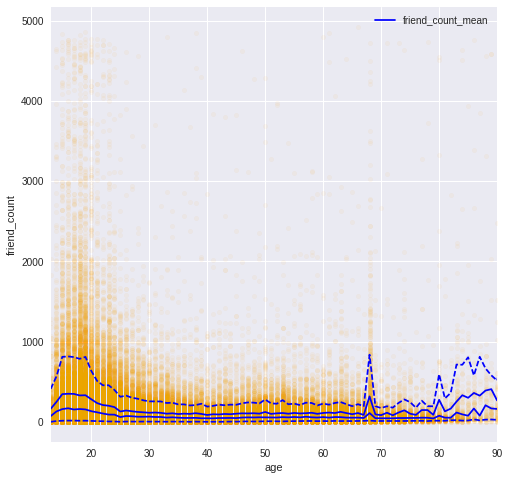

In [162]:
# Without the axis scaling
fig, ax = plt.subplots(1)

# ax.set_yscale('symlog')

pf.plot.scatter(x='age', y='friend_count', alpha=1/20,color='orange', ax=ax)

pf_c_by_age.plot.line(x='age', y='friend_count_mean',color='blue', ax=ax)

#Ploting the quantile on the fly
pf.groupby('age').friend_count.quantile(0.1).plot.line(color='blue',style='--', ax=ax)
pf.groupby('age').friend_count.quantile(0.5).plot.line(color='blue',style='-', ax=ax)
pf.groupby('age').friend_count.quantile(0.9).plot.line(color='blue',style='--', ax=ax)

plt.xlim(13,90);
# plt.ylim(ymin=1);

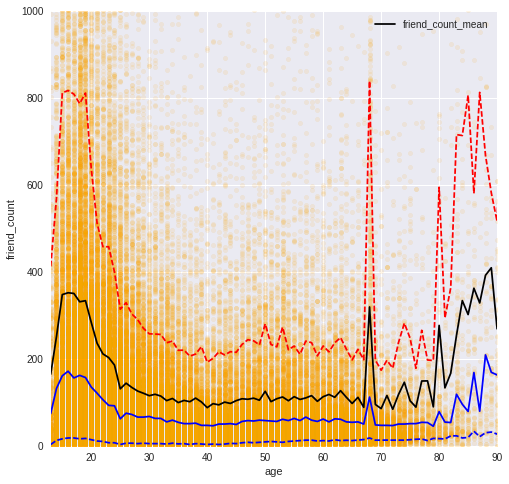

In [166]:
# zooming in
fig, ax = plt.subplots(1)

# ax.set_yscale('symlog')

pf.plot.scatter(x='age', y='friend_count', alpha=1/10,color='orange', ax=ax)

pf_c_by_age.plot.line(x='age', y='friend_count_mean',color='black', ax=ax)

#Ploting the quantile on the fly
pf.groupby('age').friend_count.quantile(0.1).plot.line(color='blue',style='--', ax=ax)
pf.groupby('age').friend_count.quantile(0.5).plot.line(color='blue',style='-', ax=ax)
pf.groupby('age').friend_count.quantile(0.9).plot.line(color='red',style='--', ax=ax)

plt.xlim(13,90)
plt.ylim(0,1000);

I am still missing the upper part of the y-range since I cannot scale the axis in python in sqrt the same way

# Correlation

In [168]:
%%R
library(stats)
cor.test(pf$age, pf$friend_count)


	Pearson's product-moment correlation

data:  pf$age and pf$friend_count
t = -8.6268, df = 99001, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03363072 -0.02118189
sample estimates:
        cor 
-0.02740737 



In [169]:
%%R
# Alternative
with(pf, cor.test(age, friend_count))


	Pearson's product-moment correlation

data:  age and friend_count
t = -8.6268, df = 99001, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03363072 -0.02118189
sample estimates:
        cor 
-0.02740737 



In [172]:
pf[['age','friend_count']].corr()

,age,friend_count
age,1.000000,-0.027407
friend_count,-0.027407,1.000000


In [173]:
pf.age.corr(pf.friend_count)

-0.02740737154230408

In [174]:
np.corrcoef(pf.age, pf.friend_count)

array([[ 1.        , -0.02740737],
       [-0.02740737,  1.        ]])

In [175]:
np.correlate(pf.age, pf.friend_count) ##??

array([700962402])

### Correlation on Subsets


In [176]:
%%R
with(subset(pf, age<=70), cor.test(age, friend_count))


	Pearson's product-moment correlation

data:  age and friend_count
t = -52.592, df = 91029, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1780220 -0.1654129
sample estimates:
       cor 
-0.1717245 



In [178]:
pf.age[pf.age<=70].corr(pf.friend_count)

-0.17172448270245838

### Correlation Methods

In [179]:
%%R
with(subset(pf, age<=70), cor.test(age, friend_count, method = 'spearman'))


	Spearman's rank correlation rho

data:  age and friend_count
S = 1.5782e+14, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2552934 



In [180]:
pf.age[pf.age<=70].corr(pf.friend_count, method='spearman')

-0.25529339549271318

# Scatterplot Exercise

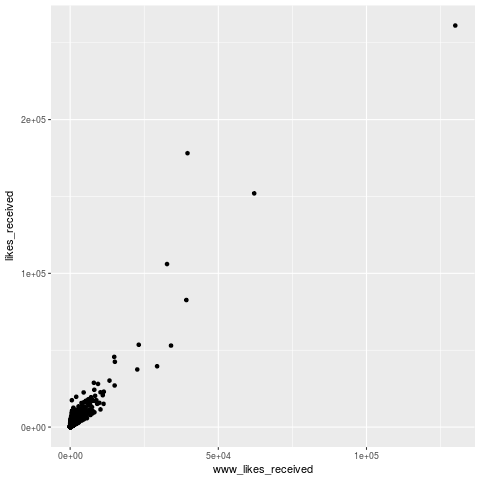

In [182]:
%%R
ggplot(aes(x = www_likes_received, y=likes_received), data=pf) +  
  geom_point()

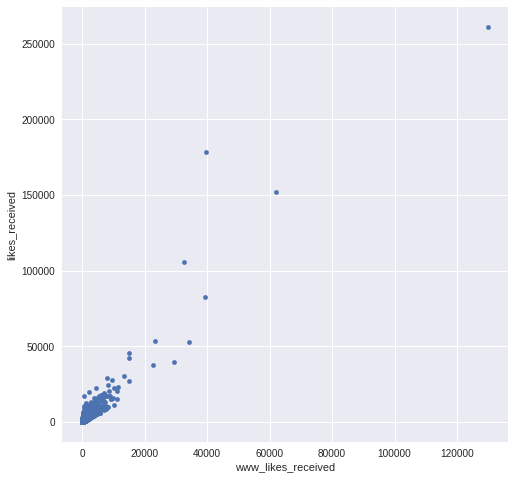

In [185]:
pf.plot.scatter(x = 'www_likes_received', y='likes_received');

## Strong Correlations

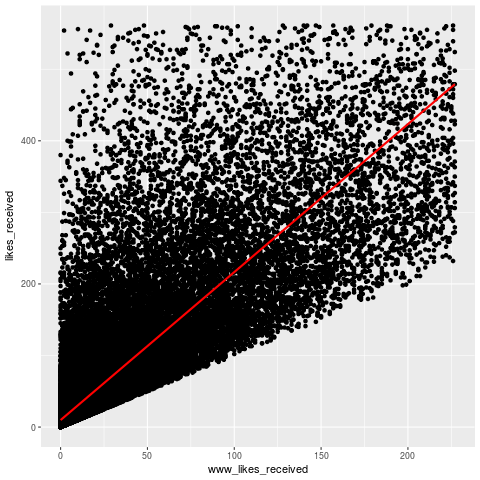

In [207]:
%%R
ggplot(aes(x=www_likes_received, y=likes_received), data=pf) + 
  geom_point() + 
  xlim(0, quantile(pf$www_likes_received, 0.95)) + 
  ylim(0, quantile(pf$likes_received, 0.95)) +
  geom_smooth(method = 'lm', color = 'red')

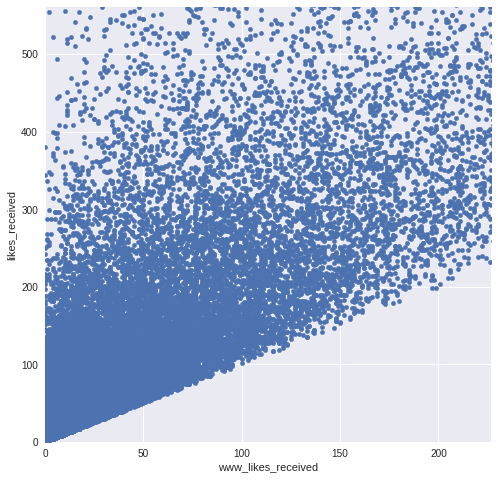

In [216]:
fig, ax = plt.subplots(1)
pf.plot.scatter(x = 'www_likes_received', y='likes_received', ax=ax)
# pf.plot.line(x = 'www_likes_received', y='likes_received', ax=ax, color='red') # Doesn't work
plt.xlim(0, pf.www_likes_received.quantile(.95))
plt.ylim(0, pf.likes_received.quantile(.95));

### Use sklearn to fit the linear regression 

In [240]:
# Have to convert the training X to 2d dimesional array first
X = pf.www_likes_received.values.reshape(len(pf.www_likes_received), 1)
X

array([[   0],
       [   0],
       [   0],
       ..., 
       [1092],
       [ 756],
       [2913]])

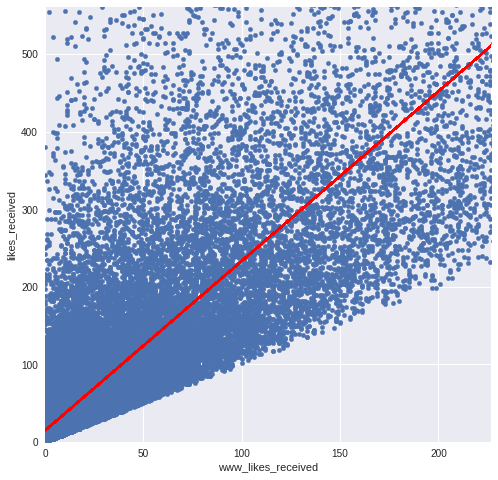

In [245]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, pf.likes_received)

fig, ax = plt.subplots(1)
pf.plot.scatter(x = 'www_likes_received', y='likes_received', ax=ax)
plt.plot(X, reg.predict(X), color='red')
# pf.plot.line(x = 'www_likes_received', y='likes_received', ax=ax, color='red') # Doesn't work
plt.xlim(0, pf.www_likes_received.quantile(.95))
plt.ylim(0, pf.likes_received.quantile(.95));

Seaborn is the faster solution in this case

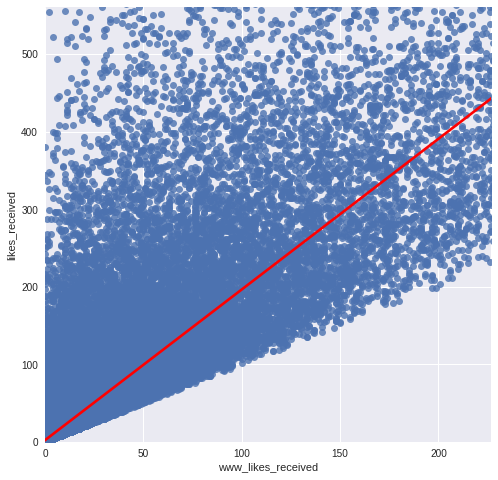

In [206]:
ax = sns.regplot(x = 'www_likes_received', y='likes_received', data=pf, line_kws = {'color': 'red'},
                robust=True, ci=None)
sns.plt.xlim(0, pf.www_likes_received.quantile(.95))
sns.plt.ylim(0, pf.likes_received.quantile(.95));

### Trying out ggplot for Python

In [191]:
from ggplot import *

/home/jkb/anaconda3/lib/python3.6/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


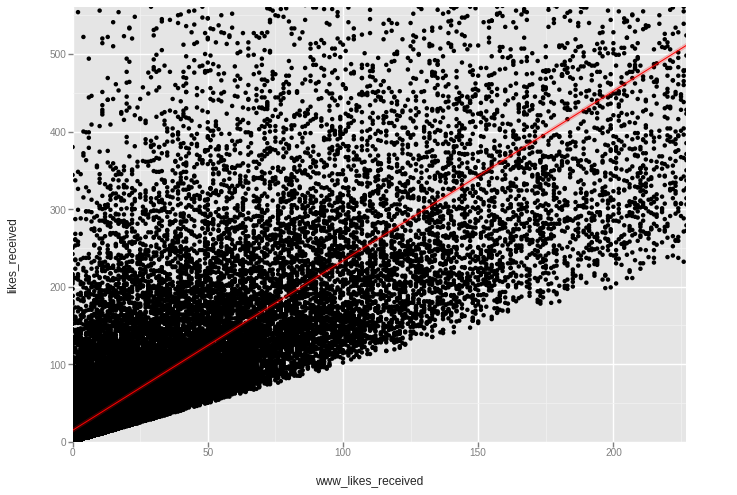

<ggplot: (8776123141005)>

In [227]:
ggplot(aes(x='www_likes_received', y='likes_received'), data=pf) + \
geom_point() + \
xlim(0, pf.www_likes_received.quantile(.95)) + \
ylim(0, pf.likes_received.quantile(.95)) + \
stat_smooth(color = 'red') ## Yeay!!

Python-ggplot example:

/home/jkb/anaconda3/lib/python3.6/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


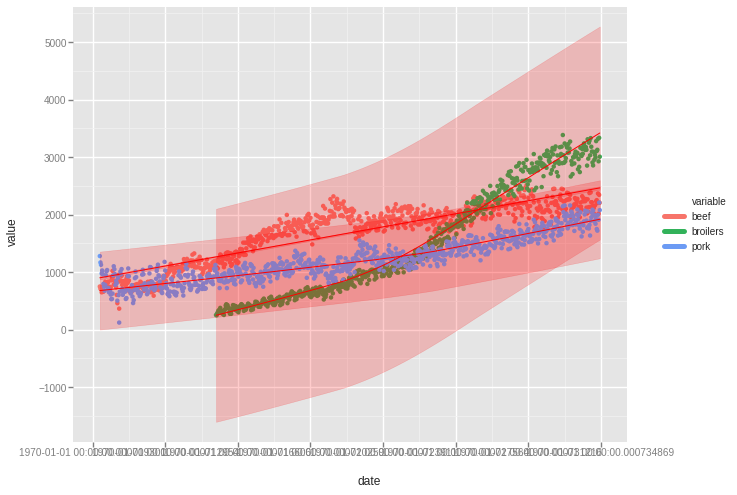

<ggplot: (-9223363260731274019)>

In [198]:
meat_lng = pd.melt(meat[['date', 'beef', 'pork', 'broilers']], id_vars='date')
ggplot(aes(x='date', y='value', colour='variable'), data=meat_lng) + \
    geom_point() + \
    stat_smooth(color='red')

### Correlation Calculation
What's the correlation between the two variables? Include the top 5% of values for the variable in the calculation and round to 3 decimal places.

In [246]:
%%R
with(pf, cor.test(www_likes_received, likes_received, method = 'pearson'))


	Pearson's product-moment correlation

data:  www_likes_received and likes_received
t = 937.1, df = 99001, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9473553 0.9486176
sample estimates:
      cor 
0.9479902 



### Trying Scipy.stats

In [259]:
import scipy
c = scipy.stats.pearsonr(pf.www_likes_received, pf.likes_received)[0]
round(c,3)

0.94799999999999995

# More caution with correlations

## Plot a scatter plot from the Mitchell Dataset

In [266]:
%ls

correlation_images.jpeg  lesson4_student.rmd  pseudo_facebook.tsv
Lesson 4.ipynb           Mitchell.csv


In [9]:
%%R
Mitchell = read.csv('Mitchell.csv')
head(Mitchell)

  Month     Temp
1     0 -5.18333
2     1 -1.65000
3     2  2.49444
4     3 10.40000
5     4 14.99440
6     5 21.71670


In [10]:
mitchell = r.Mitchell

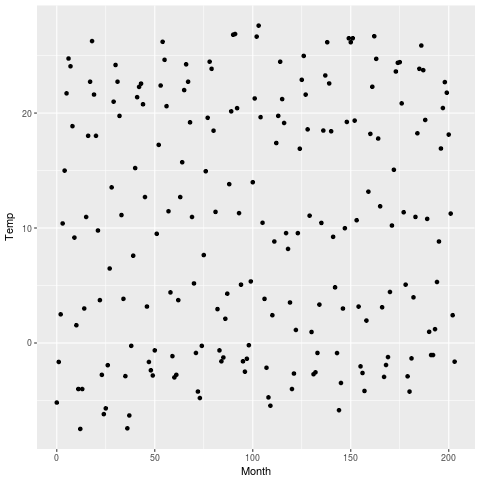

In [271]:
%%R
ggplot(aes(x=Month, y=Temp), data=Mitchell) + 
  geom_point()

In [272]:
#Let's use the R object just for fun
r.Mitchell.head()

,Month,Temp
1,0,-5.18333
2,1,-1.65000
3,2,2.49444
4,3,10.40000
5,4,14.99440


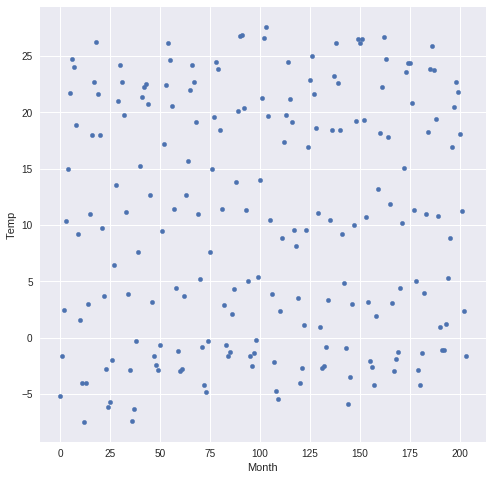

In [275]:
r.Mitchell.plot.scatter(x='Month', y='Temp');

## Noisy Scatterplots - Coefficiennts

a. Take a guess for the correlation coefficient for the scatterplot.
0.5

b. What is the actual correlation of the two variables?
(Round to the thousandths place)
0.057

In [276]:
%%R
with(Mitchell, cor(Month, Temp))
with(Mitchell, cor.test(Month, Temp))


	Pearson's product-moment correlation

data:  Month and Temp
t = 0.81816, df = 202, p-value = 0.4142
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.08053637  0.19331562
sample estimates:
       cor 
0.05747063 



In [278]:
scipy.stats.pearsonr(mitchell.Month, mitchell.Temp)

(0.057470629450414333, 0.41422797458167238)

## Making sense of data - xscale

In [283]:
%%R
range(Mitchell$Month)

[1]   0 203


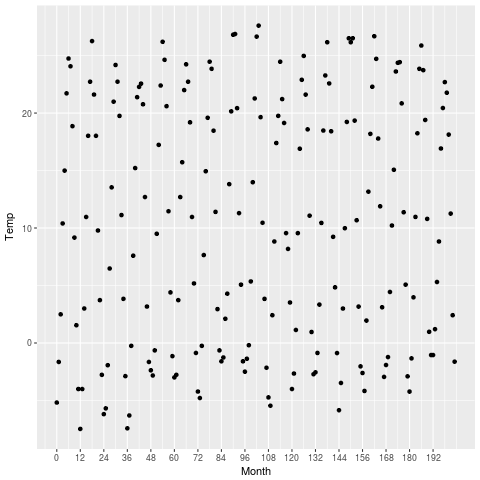

In [281]:
%%R
ggplot(aes(x=Month, y=Temp), data=Mitchell) + 
  geom_point() + 
  scale_x_continuous(breaks = seq(0, 203, 12))

In [289]:
r.Mitchell.Month.describe().loc[['min', 'max']]

min      0.0
max    203.0
Name: Month, dtype: float64

In [291]:
# Alternaive
r.Mitchell.Month.ptp() # Nope, returns the difference of values


203

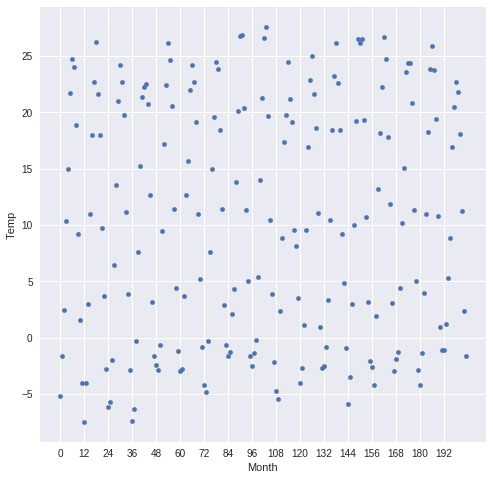

In [280]:
r.Mitchell.plot.scatter(x='Month', y='Temp')
plt.xticks(range(0,203,12));

## A New Perspective

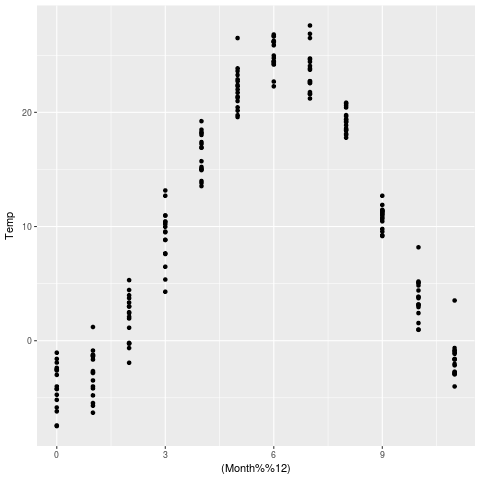

In [292]:
%%R
#Detect the yearly flunctuation in the data
ggplot(aes(x=(Month%%12),y=Temp), data=Mitchell)+
  geom_point()

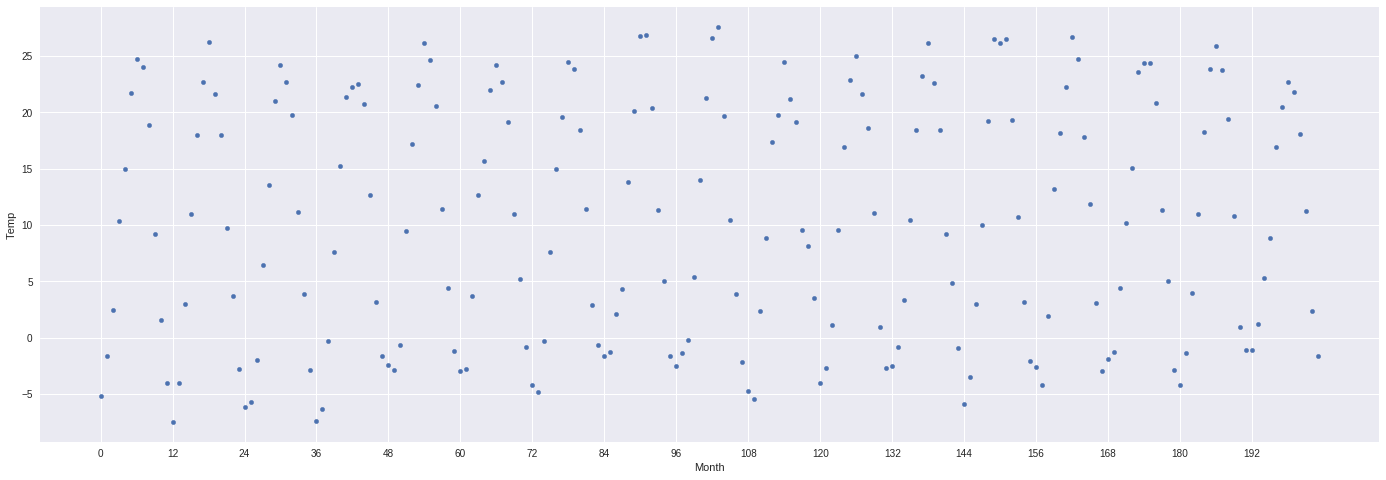

In [300]:
r.Mitchell.plot.scatter(x='Month', y='Temp', figsize=(24,8))
plt.xticks(range(0,203,12));

## Data Visualization Pioneers

John Tukey

William Playfair

William Playfair and the Psychology of Graphs

There are other measures of associations that can detect this. The dcor.ttest() function in the energy package implements a non-parametric test of the independence of two variables. While the Mitchell soil dataset is too coarse to identify a significant dependency between "Month" and "Temp", we can see the difference between dcor.ttest and cor.test through other examples, like the following:
```r
x <- seq(0, 4*pi, pi/20)
y <- cos(x)
qplot(x = x, y = y)
dcor.ttest(x, y)
```

There is a yearly cyclical pattern here that is obvious if we stretch the plot.

We can also overrlay each yearr and see the yearly pattern like follows:

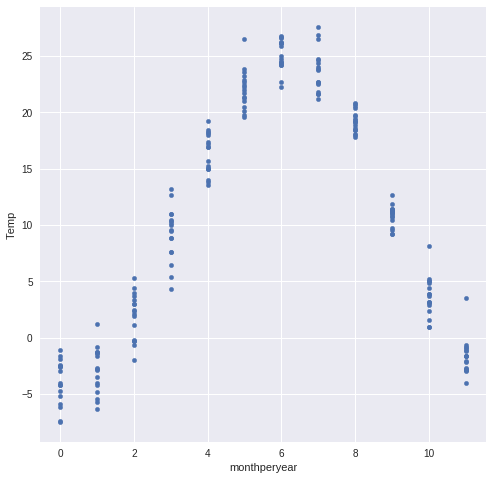

In [304]:
mitchell['monthperyear'] = mitchell.Month%12
mitchell.plot.scatter(x='monthperyear', y='Temp');

# Understanding Noise: Age to Age Months

Add a month decimal to the years

In [12]:
%%R

pf$age_with_months <- pf$age + (12 - pf$dob_month) / 12
head(pf)

   userid age dob_day dob_year dob_month gender tenure friend_count
1 2094382  14      19     1999        11   male    266            0
2 1192601  14       2     1999        11 female      6            0
3 2083884  14      16     1999        11   male     13            0
4 1203168  14      25     1999        12 female     93            0
5 1733186  14       4     1999        12   male     82            0
6 1524765  14       1     1999        12   male     15            0
  friendships_initiated likes likes_received mobile_likes mobile_likes_received
1                     0     0              0            0                     0
2                     0     0              0            0                     0
3                     0     0              0            0                     0
4                     0     0              0            0                     0
5                     0     0              0            0                     0
6                     0     0              0

In [13]:
pf['age_with_months'] = pf.age + (12 - pf.dob_month) / 12
pf.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_with_months
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,14.083333
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,14.083333
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,14.083333
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,14.000000
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,14.000000


## Age with Months Means

In [ ]:
# Create a new data frame called
# pf.fc_by_age_months that contains
# the mean friend count, the median friend
# count, and the number of users in each
# group of age_with_months. The rows of the
# data framed should be arranged in increasing
# order by the age_with_months variable.

# For example, the first two rows of the resulting
# data frame would look something like...

# age_with_months  friend_count_mean	friend_count_median	n
#              13            275.0000                   275 2
#        13.25000            133.2000                   101 11


# See the Instructor Notes for two hints if you get stuck.
# This programming assignment will automatically be graded.

In [15]:
%%R

fc_by_age_months_groups <- group_by(pf, age_with_months)

pf.fc_by_age_months <- summarise(fc_by_age_months_groups ,
                          friend_count_mean = mean(friend_count),
                          friend_count_median = median(friend_count),
                          n = n())

pf.fc_by_age_monthse <- arrange(pf.fc_by_age_months)

head(pf.fc_by_age_months)

# A tibble: 6 × 4
  age_with_months friend_count_mean friend_count_median     n
            <dbl>             <dbl>               <dbl> <int>
1        13.16667          46.33333                30.5     6
2        13.25000         115.07143                23.5    14
3        13.33333         136.20000                44.0    25
4        13.41667         164.24242                72.0    33
5        13.50000         131.17778                66.0    45
6        13.58333         156.81481                64.0    54


In [17]:
fc_by_age_months_grouped = pf.groupby('age_with_months')

fc_by_age_months = fc_by_age_months_grouped.friend_count.aggregate([np.mean, np.median, len])
fc_by_age_months.head()

,mean,median,len
age_with_months,,,
13.166667,46.333333,30.5,6
13.250000,115.071429,23.5,14
13.333333,136.200000,44.0,25
13.416667,164.242424,72.0,33
13.500000,131.177778,66.0,45


In [25]:
#alternative
fc_by_age_months_grouped = pf.groupby('age_with_months')

fc_by_age_months = fc_by_age_months_grouped.friend_count.aggregate([np.mean, np.median, len])

fc_by_age_months = pd.DataFrame({'age_with_months':fc_by_age_months.index,
                                'friend_count_mean': fc_by_age_months['mean'],
                                'friend_count_median': fc_by_age_months['median'],
                                'n': fc_by_age_months['len']}).reset_index(drop=True)

fc_by_age_months.head()

,age_with_months,friend_count_mean,friend_count_median,n
0,13.166667,46.333333,30.5,6
1,13.250000,115.071429,23.5,14
2,13.333333,136.200000,44.0,25
3,13.416667,164.242424,72.0,33
4,13.500000,131.177778,66.0,45


## Noise in Conditional Means

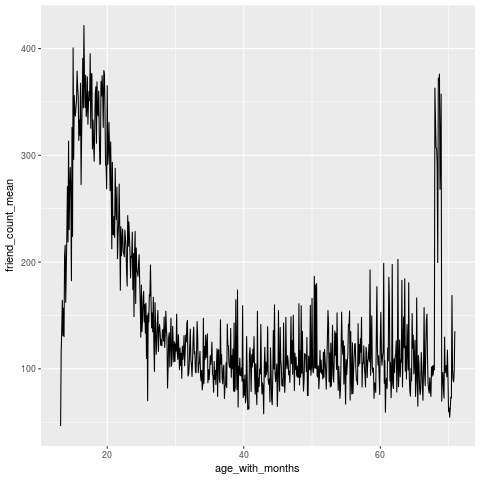

In [26]:
%%R
# Create a new line plot showing friend_count_mean versus the new variable,
# age_with_months. Be sure to use the correct data frame (the one you created
# in the last exercise) AND subset the data to investigate users with ages less
# than 71.

ggplot(aes(x = age_with_months, y = friend_count_mean), data = subset(pf.fc_by_age_months, age_with_months<71)) +
  geom_line()

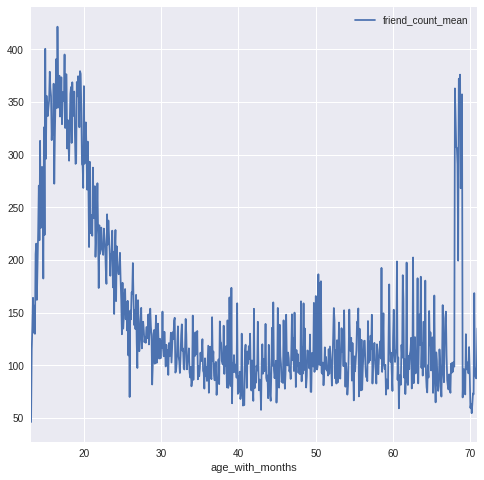

In [29]:
fc_by_age_months[fc_by_age_months.age_with_months<71].plot(x = 'age_with_months', y = 'friend_count_mean');

## Smoothing Conditional Means

/home/jkb/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘gridExtra’


  warnings.warn(x, RRuntimeWarning)
/home/jkb/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:dplyr’:

    combine


  warnings.warn(x, RRuntimeWarning)
/home/jkb/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: `geom_smooth()` using method = 'loess'

  warnings.warn(x, RRuntimeWarning)


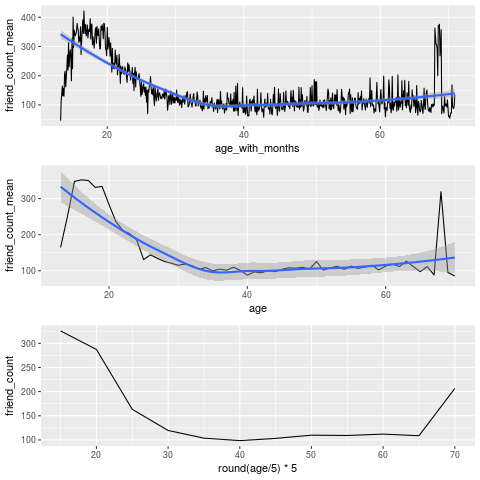

In [32]:
%%R
p1 <- ggplot(aes(x = age, y = friend_count_mean),
             data = subset(pf.fc_by_age, age<71)) + 
  geom_line() + 
  geom_smooth()

p2 <- ggplot(aes(x = age_with_months, y = friend_count_mean),
             data = subset(pf.fc_by_age_months, age_with_months<71)) + 
  geom_line() + 
  geom_smooth()

p3 <- ggplot(aes(x = round(age/5)*5, y = friend_count),
             data = subset(pf, age<71)) +
  geom_line(stat = 'summary', fun.y = mean)

library(gridExtra)
grid.arrange(p2,p1,p3, ncol = 1)

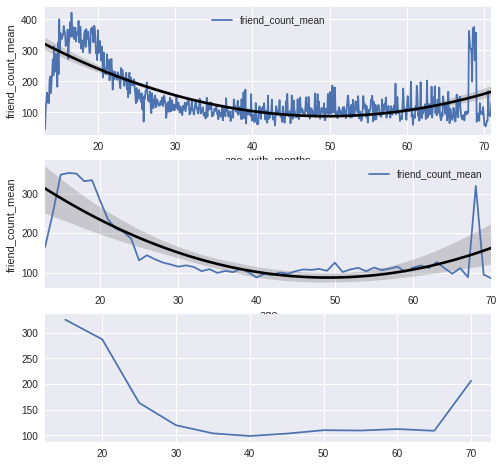

In [59]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)

#This is a small hack because i will combine seaborn's regrression line with a plot from plt
fc_by_age_months[fc_by_age_months.age_with_months<71].plot(x = 'age_with_months', y = 'friend_count_mean', ax=ax1);
sns.regplot(x = 'age_with_months', y = 'friend_count_mean', ax=ax1,
           data = fc_by_age_months[fc_by_age_months.age_with_months<71], scatter = False, order=2, color='black')

pf_c_by_age[pf_c_by_age.age<71].plot(x = 'age', y = 'friend_count_mean', ax=ax2);
sns.regplot(x = 'age', y = 'friend_count_mean', ax=ax2,
           data = pf_c_by_age[pf_c_by_age.age<71], scatter = False, order=2, color='black')

pf = pf[pf.age<71]
pf['round_age'] = np.round(pf.age/5)*5
y = pf.groupby('round_age').mean().friend_count
x = pf.groupby('round_age').mean().index
ax3.plot(x,y);

Thing are soooo more complicated if ones tries to do the same thing in python .But doable.